## Vectorbt - dual moving average strategy on single asset

In [1]:
# dual moving average strategy on single asset
import vectorbt as vbt
import warnings
import matplotlib.pyplot as plt

%matplotlib inline

warnings.filterwarnings("ignore")

### 1. Get price data from yahoo finance

In [2]:
btc_price = vbt.YFData.download("MSFT", start="2020-01-01")
btc_close_price = btc_price.get("Close")
print(btc_close_price)

Date
2019-12-31 05:00:00+00:00    152.596558
2020-01-02 05:00:00+00:00    155.422028
2020-01-03 05:00:00+00:00    153.486786
2020-01-06 05:00:00+00:00    153.883514
2020-01-07 05:00:00+00:00    152.480423
                                ...    
2023-08-03 04:00:00+00:00    326.660004
2023-08-04 04:00:00+00:00    327.779999
2023-08-07 04:00:00+00:00    330.109985
2023-08-08 04:00:00+00:00    326.049988
2023-08-09 04:00:00+00:00    322.255005
Name: Close, Length: 908, dtype: float64


### 2. Setup criteria for entry and exit points

In [3]:

SMA12 = vbt.MA.run(btc_close_price, window=12)
SMA24 = vbt.MA.run(btc_close_price, window=24)
RSI = vbt.RSI.run(btc_close_price, window = 12)

In [4]:
entries = SMA12.ma_crossed_above(SMA24)
exits = SMA24.ma_crossed_above(SMA12)

### 3. Run the backtest

In [5]:
pf = vbt.Portfolio.from_signals(btc_close_price, 
                                entries, exits, 
                                init_cash=1000, # in $,
                                fees=0.0025, # in % 
                                slippage = 0.0025 # in %
                                )
pf.stats()

Start                         2019-12-31 05:00:00+00:00
End                           2023-08-09 04:00:00+00:00
Period                                              908
Start Value                                      1000.0
End Value                                   1080.500785
Total Return [%]                               8.050079
Benchmark Return [%]                         111.181045
Max Gross Exposure [%]                            100.0
Total Fees Paid                              110.513503
Max Drawdown [%]                              43.837572
Max Drawdown Duration                             430.0
Total Trades                                         19
Total Closed Trades                                  19
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                  42.105263
Best Trade [%]                                23.976983
Worst Trade [%]                              -11

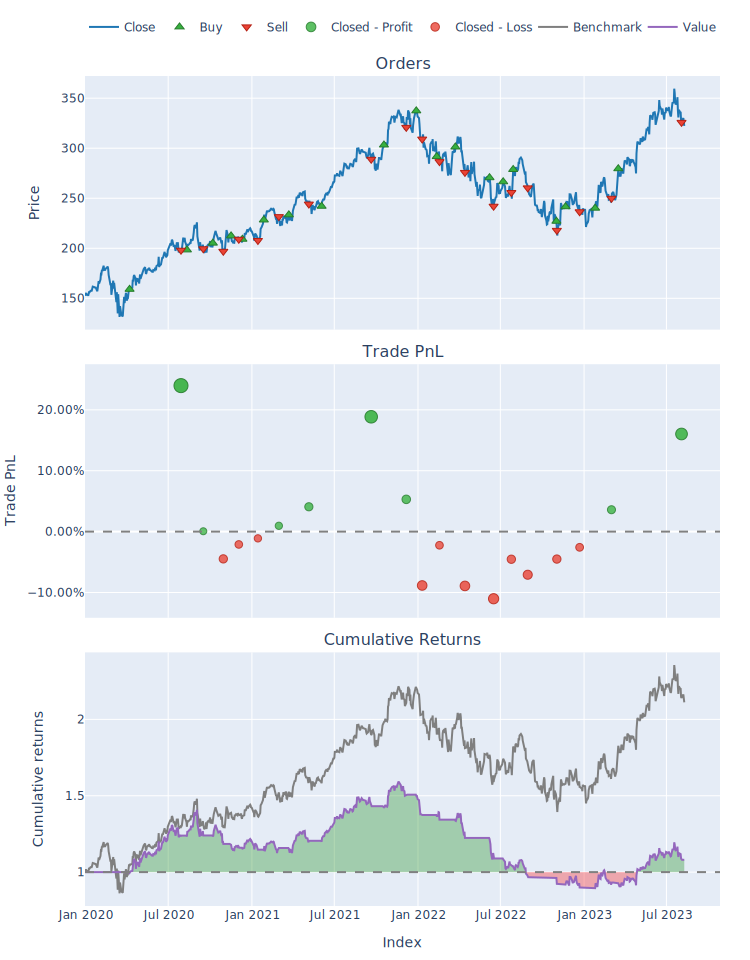

In [6]:
pf.plot().show_svg()

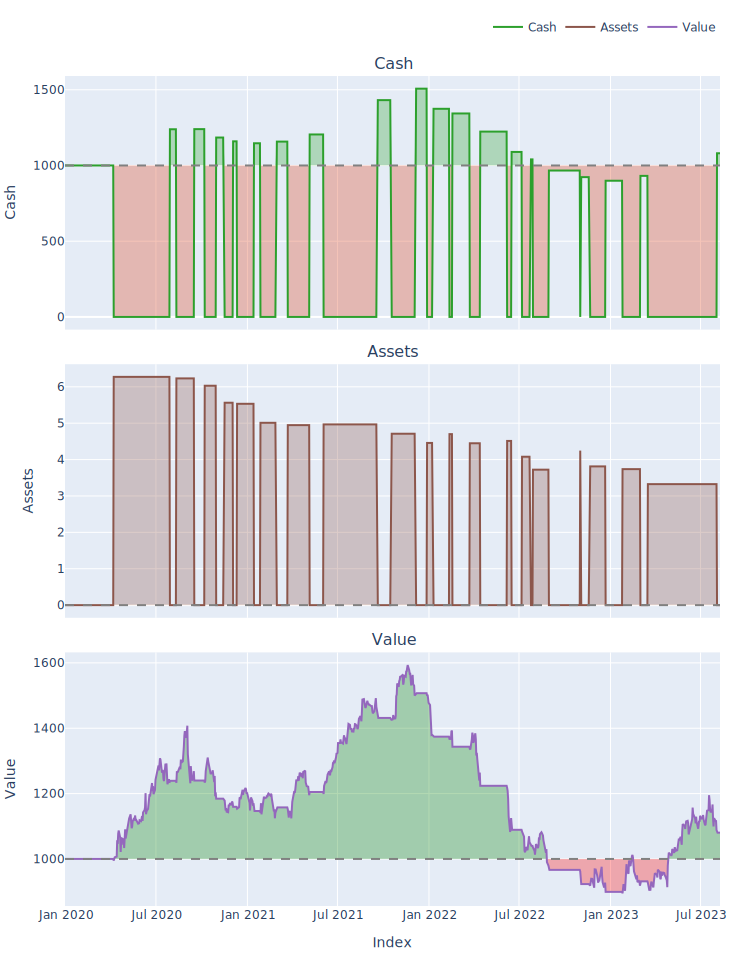

In [7]:
pf.plot(subplots=["cash", "assets","value"]).show_svg()

#### Additional work - get historical returns of the stock

In [8]:
# get historical returns
non_cumulative_returns = pf.returns()
print(non_cumulative_returns)

Date
2019-12-31 05:00:00+00:00    0.000000
2020-01-02 05:00:00+00:00    0.000000
2020-01-03 05:00:00+00:00    0.000000
2020-01-06 05:00:00+00:00    0.000000
2020-01-07 05:00:00+00:00    0.000000
                               ...   
2023-08-03 04:00:00+00:00   -0.007546
2023-08-04 04:00:00+00:00    0.000000
2023-08-07 04:00:00+00:00    0.000000
2023-08-08 04:00:00+00:00    0.000000
2023-08-09 04:00:00+00:00    0.000000
Length: 908, dtype: float64
